DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Status_of_existing_checking_account                       1000 non-null   category
 1   Duration_in_month                                         1000 non-null   int64   
 2   Credit_history                                            1000 non-null   category
 3   Purpose                                                   1000 non-null   category
 4   Credit_amount                                             1000 non-null   int64   
 5   Savings_account/bonds                                     1000 non-null   category
 6   Present_employment_since                                  1000 non-null   category
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int64  

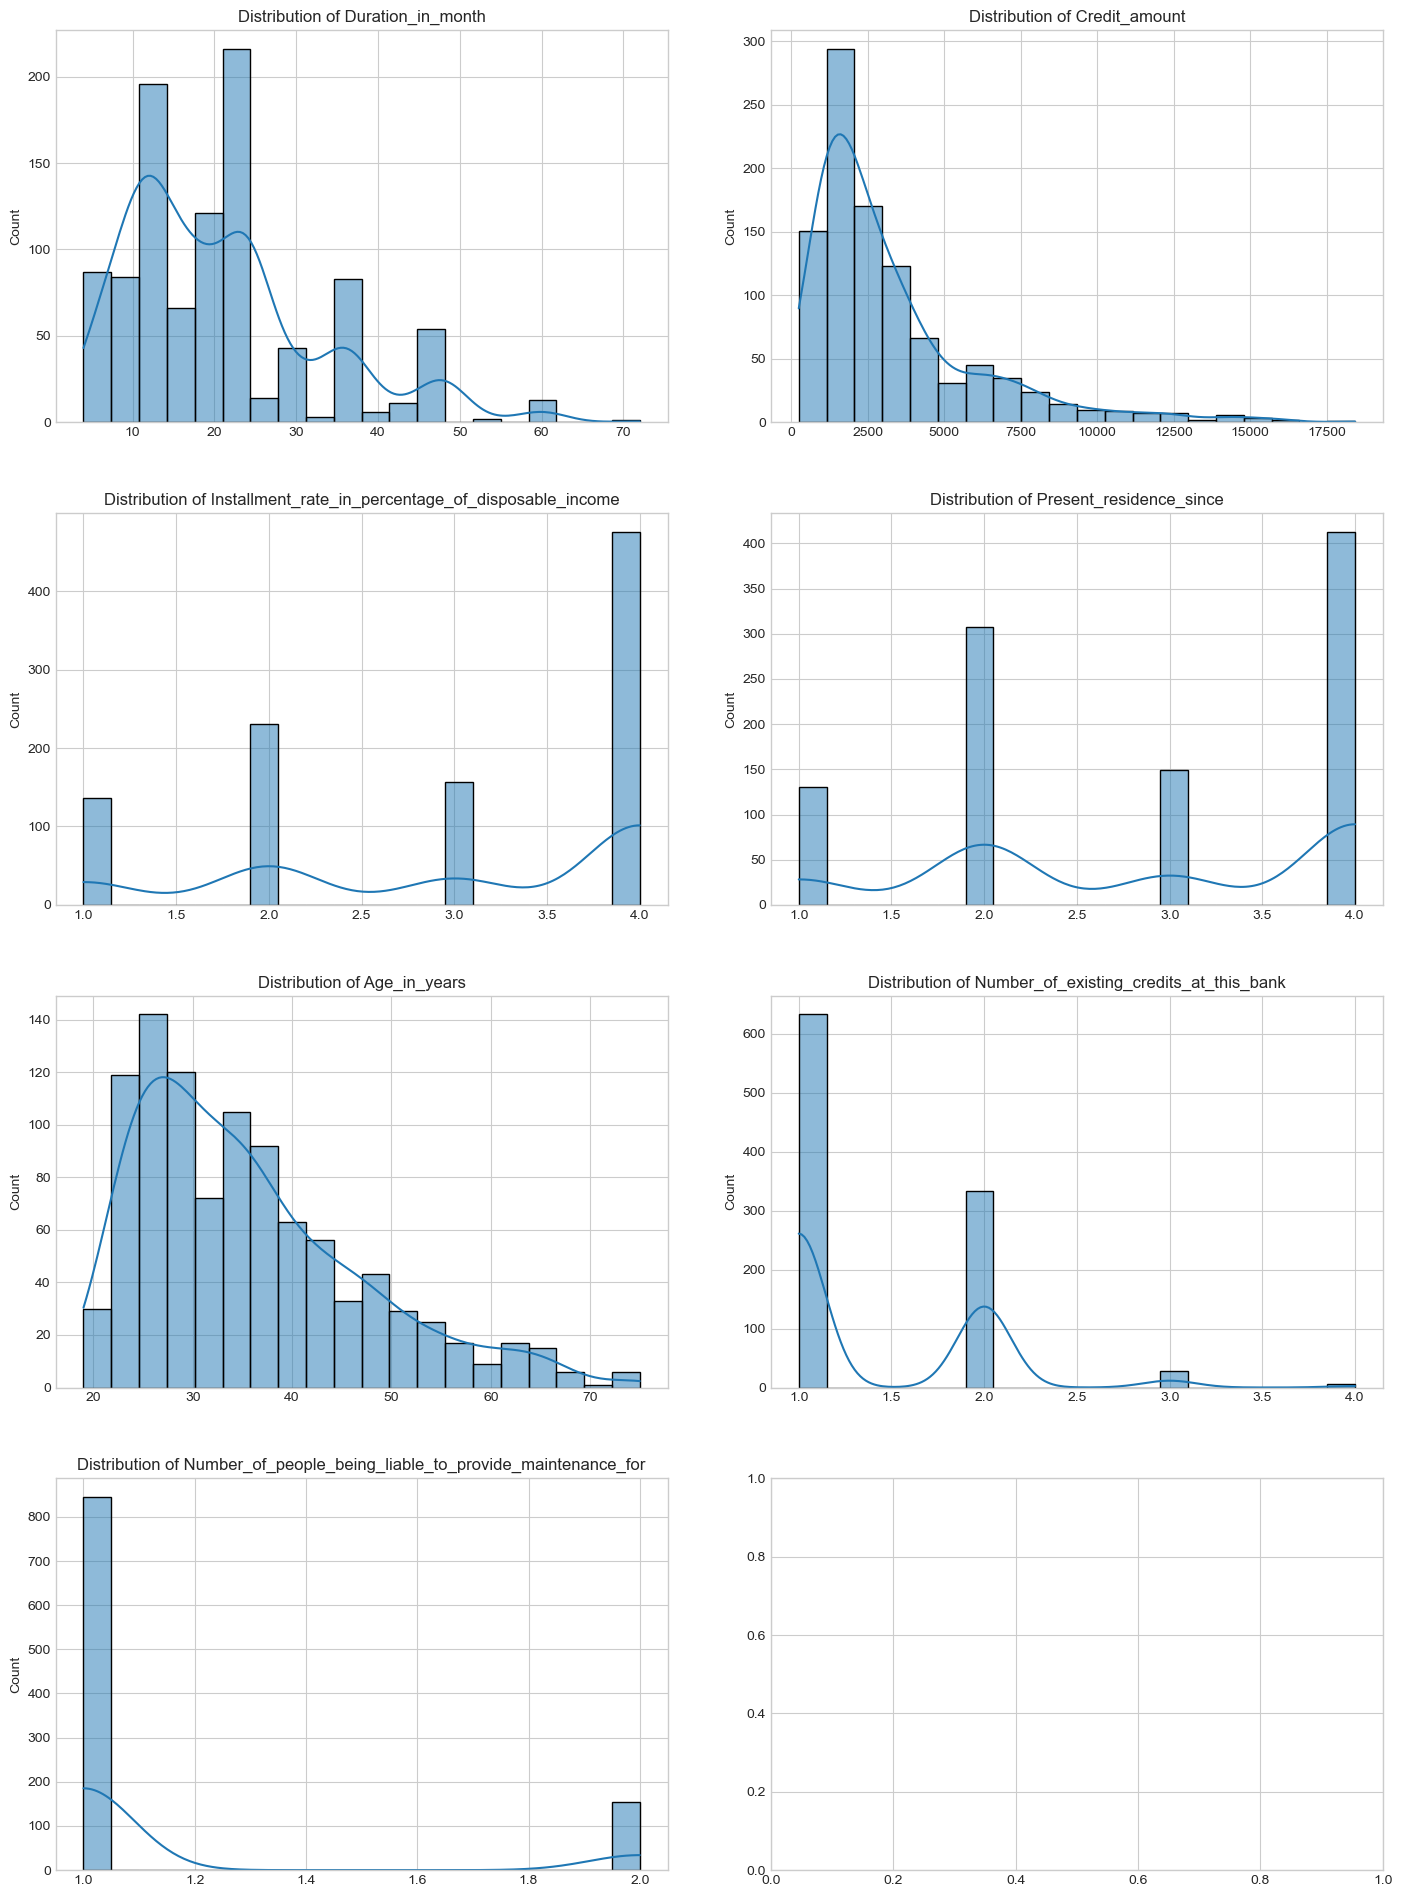


Value Counts for Categorical Features:

Status_of_existing_checking_account:
Status_of_existing_checking_account
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

Credit_history:
Credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

Purpose:
Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: count, dtype: int64

Savings_account/bonds:
Savings_account/bonds
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

Present_employment_since:
Present_employment_since
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64

Personal_status_and_sex:
Personal_status_and_sex
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64

Other_debtors/guarantors:
Other_debtors/guarantors
A101    907
A103     52
A102     41
Name: count, dtype: int64

Property:
Property
A123    332
A121    282
A

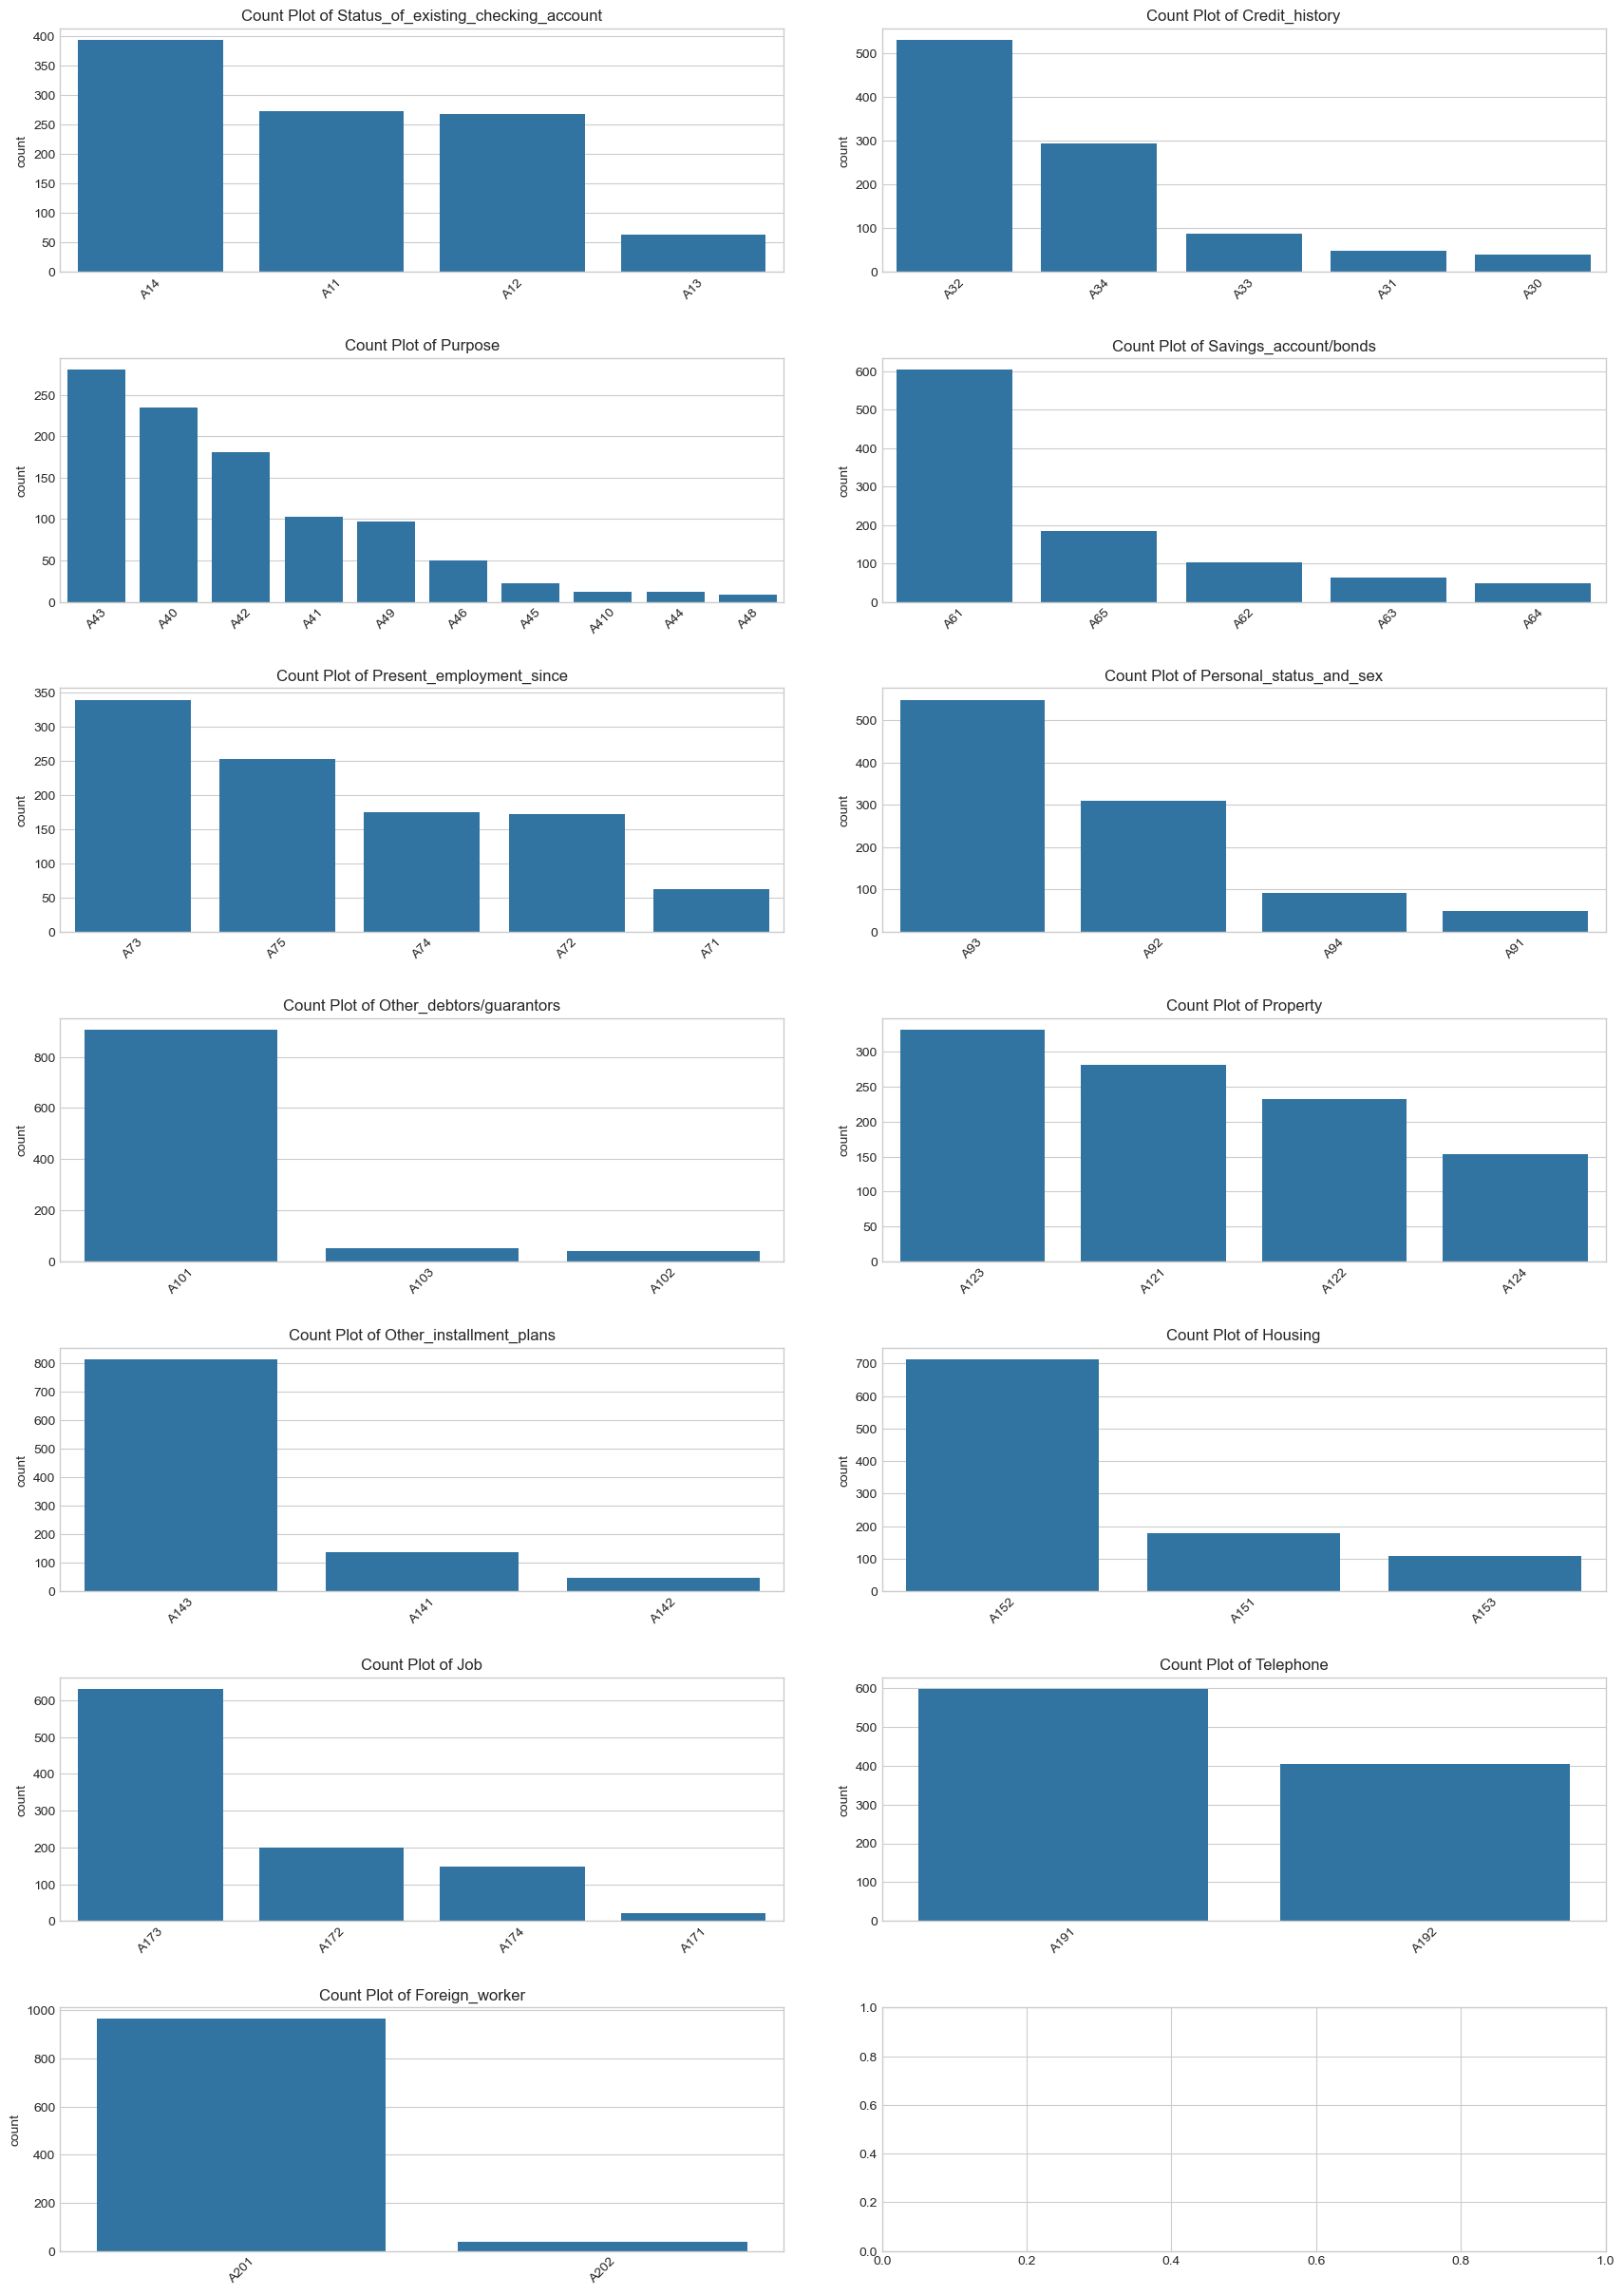


--- Bivariate Analysis ---


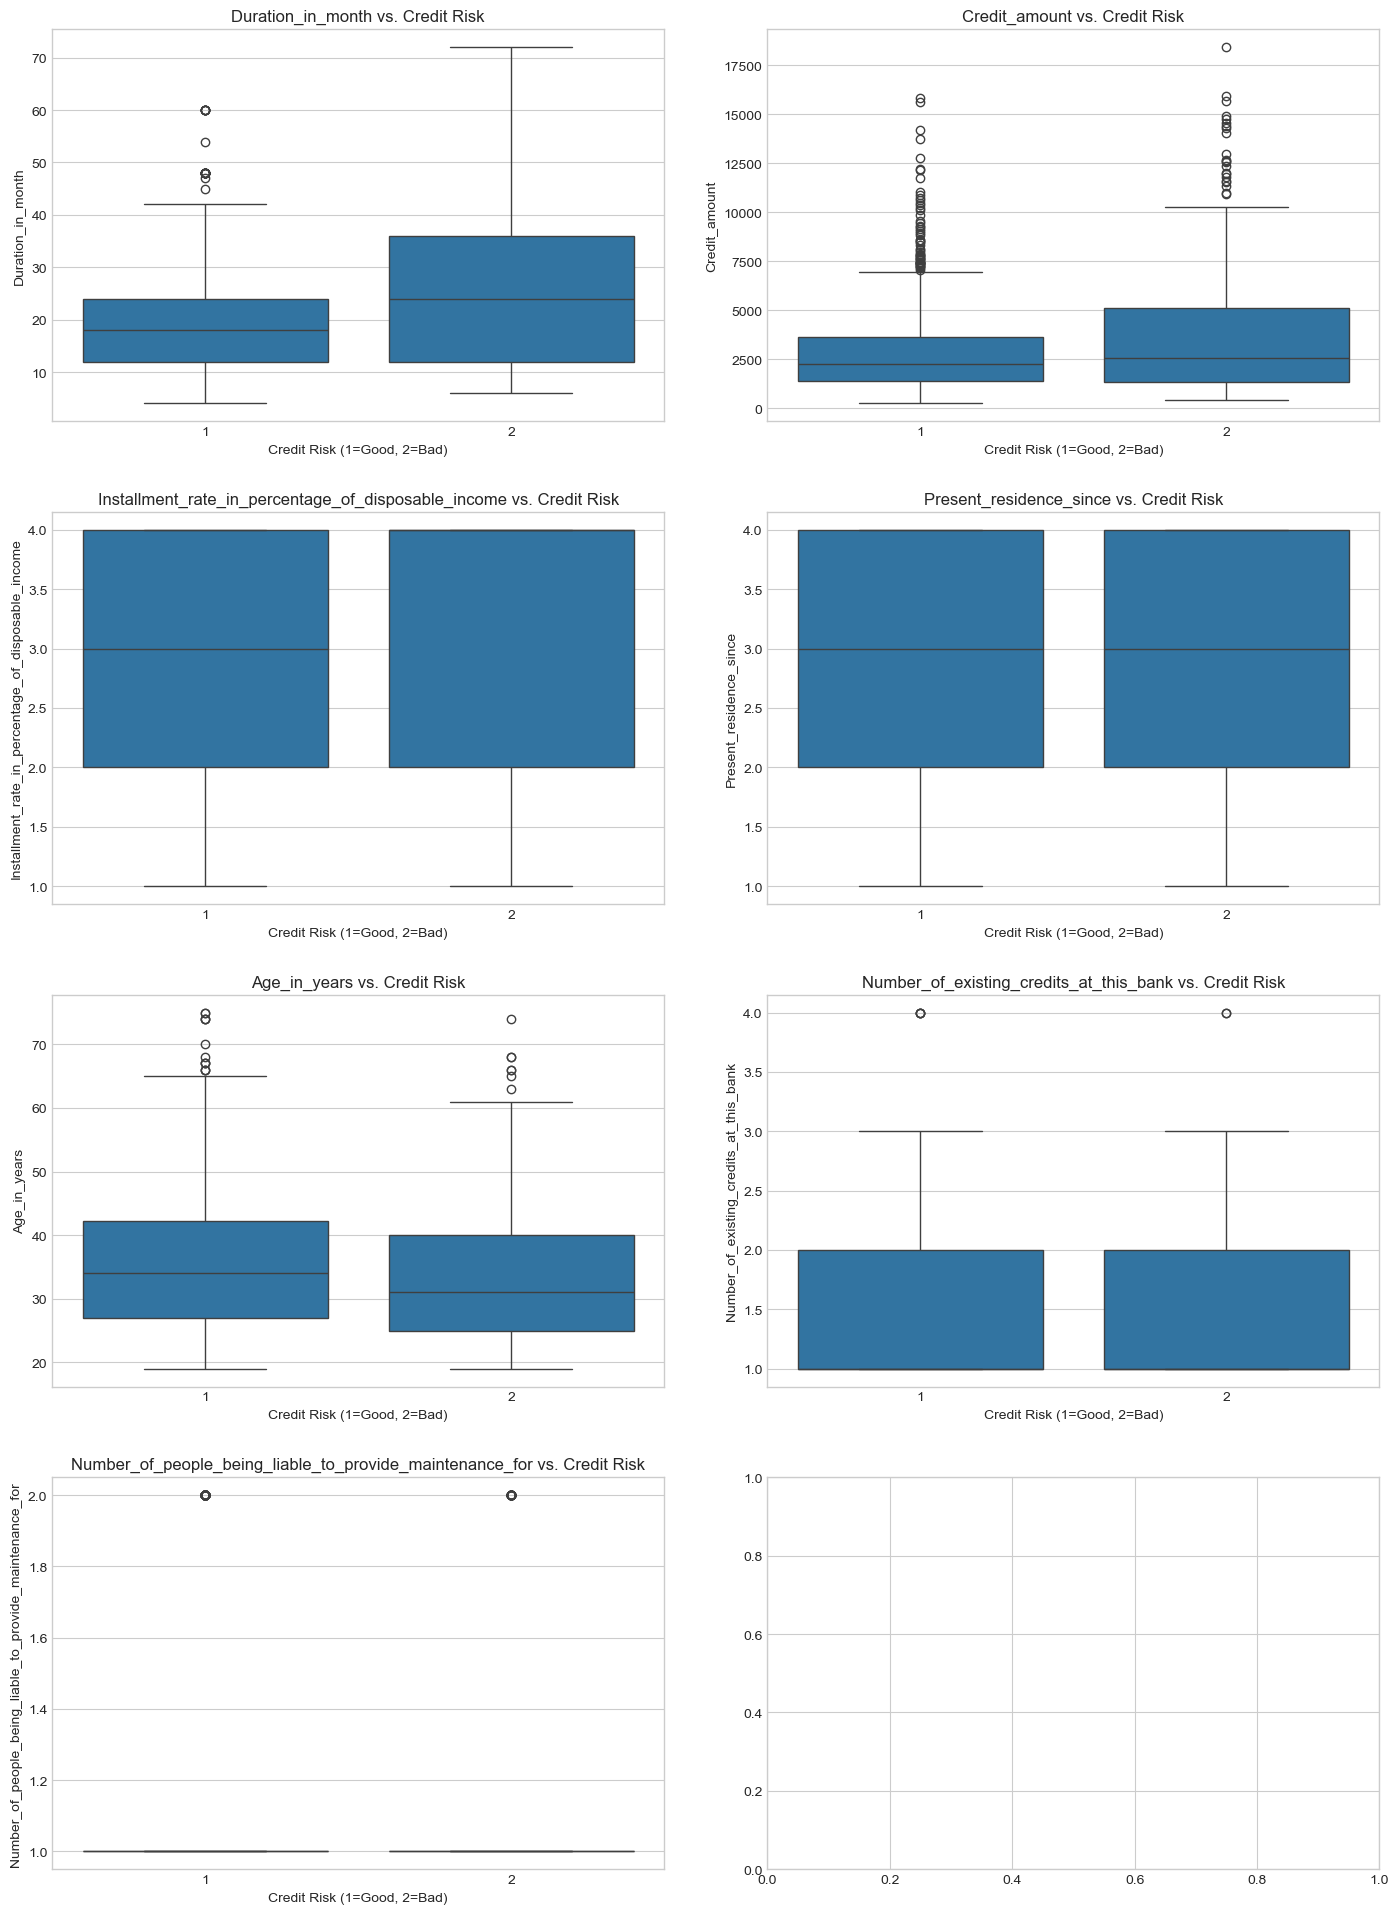

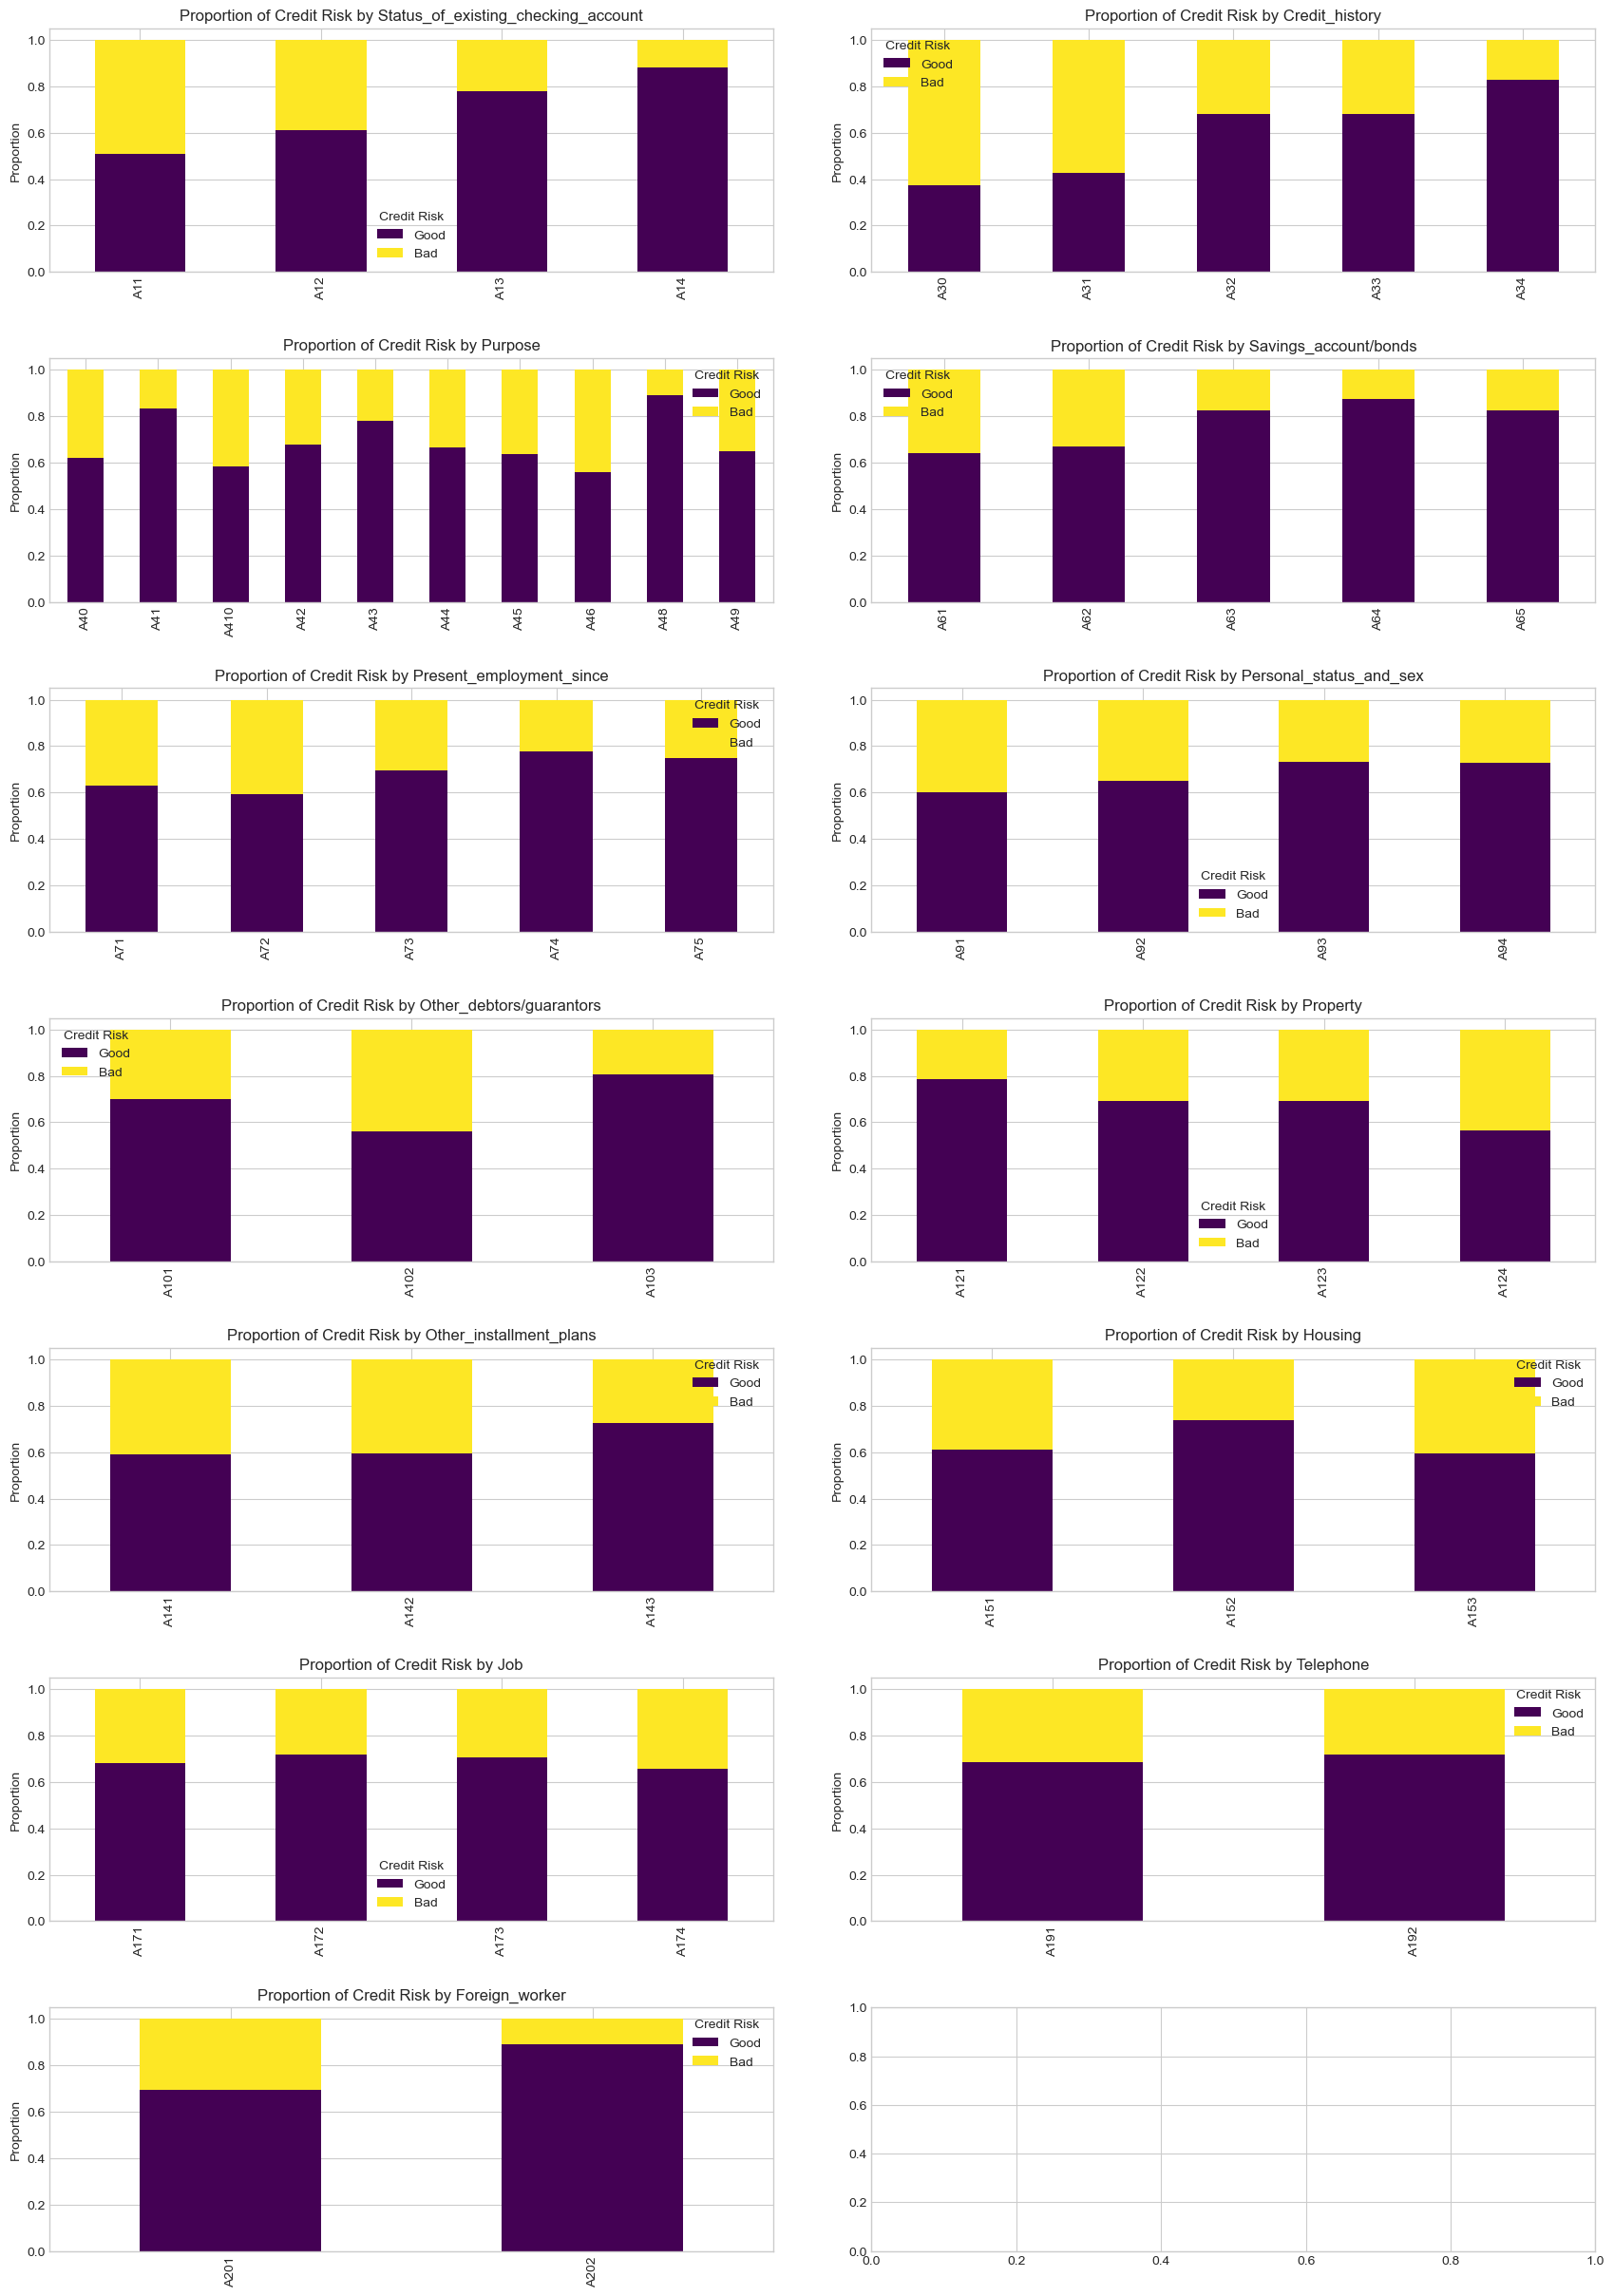


--- Correlation Analysis ---

Correlation Matrix:
                                                    Duration_in_month  \
Duration_in_month                                            1.000000   
Credit_amount                                                0.624984   
Installment_rate_in_percentage_of_disposable_in...           0.074749   
Present_residence_since                                      0.034067   
Age_in_years                                                -0.036136   
Number_of_existing_credits_at_this_bank                     -0.011284   
Number_of_people_being_liable_to_provide_mainte...          -0.023834   

                                                    Credit_amount  \
Duration_in_month                                        0.624984   
Credit_amount                                            1.000000   
Installment_rate_in_percentage_of_disposable_in...      -0.271316   
Present_residence_since                                  0.028926   
Age_in_years       

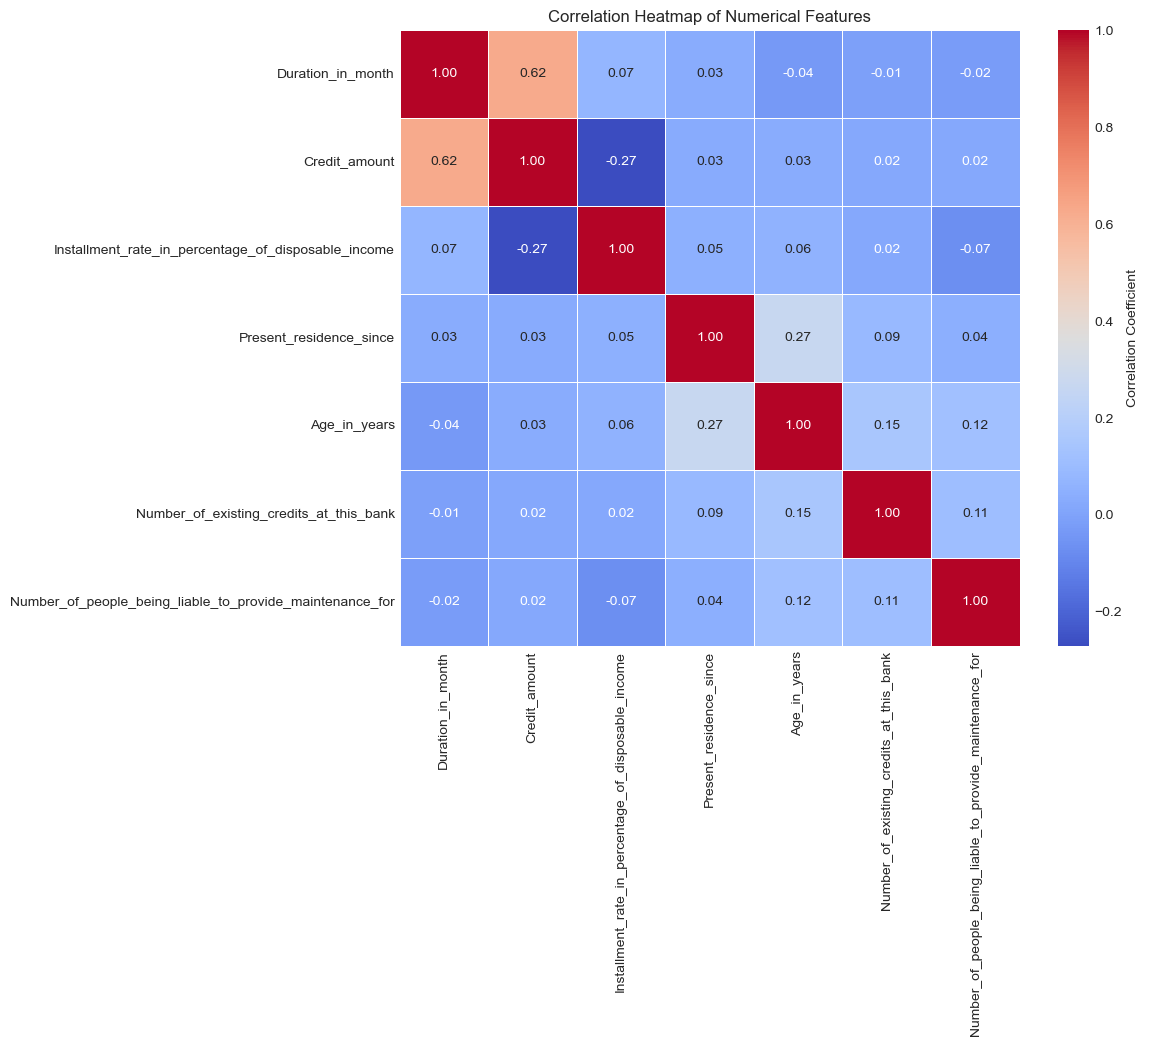

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define column names based on the dataset description
column_names = [
    'Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history',
    'Purpose', 'Credit_amount', 'Savings_account/bonds',
    'Present_employment_since', 'Installment_rate_in_percentage_of_disposable_income',
    'Personal_status_and_sex', 'Other_debtors/guarantors',
    'Present_residence_since', 'Property', 'Age_in_years',
    'Other_installment_plans', 'Housing', 'Number_of_existing_credits_at_this_bank',
    'Job', 'Number_of_people_being_liable_to_provide_maintenance_for',
    'Telephone', 'Foreign_worker', 'Credit_risk'
]

# Load the dataset
# The dataset has no header and attributes are space-separated
df = pd.read_csv(
    'german.data',
    sep=' ',
    header=None,
    names=column_names
)

# Convert categorical features to 'category' data type
categorical_cols = [
    'Status_of_existing_checking_account', 'Credit_history', 'Purpose',
    'Savings_account/bonds', 'Present_employment_since',
    'Personal_status_and_sex', 'Other_debtors/guarantors', 'Property',
    'Other_installment_plans', 'Housing', 'Job', 'Telephone',
    'Foreign_worker', 'Credit_risk'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

print("DataFrame Info:")
print(df.info())

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# --- Univariate Analysis ---
print("\n--- Univariate Analysis ---")

# 1. Distribution of Numerical Features
numerical_cols = [
    'Duration_in_month', 'Credit_amount', 'Installment_rate_in_percentage_of_disposable_income',
    'Present_residence_since', 'Age_in_years',
    'Number_of_existing_credits_at_this_bank',
    'Number_of_people_being_liable_to_provide_maintenance_for'
]

print("\nDescriptive Statistics for Numerical Features:")
print(df[numerical_cols].describe())

# Plot histograms for numerical features
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
plt.show()

# 2. Distribution of Categorical Features
print("\nValue Counts for Categorical Features:")
for col in categorical_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")

# Plot bar charts for categorical features
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18, 25))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
for i, col in enumerate(categorical_cols[:-1]):  # Exclude target for this plot
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
plt.show()

# --- Bivariate Analysis ---
print("\n--- Bivariate Analysis ---")

# 1. Numerical vs. Target Variable (Credit_risk)
# Plot box plots for numerical features against the target variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Credit_risk', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Credit Risk')
    axes[i].set_xlabel('Credit Risk (1=Good, 2=Bad)')
plt.show()

# 2. Categorical vs. Target Variable (Credit_risk)
# Plot stacked bar charts for categorical features against the target variable
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18, 25))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
for i, col in enumerate(categorical_cols[:-1]):
    cross_tab = pd.crosstab(df[col], df['Credit_risk'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], cmap='viridis')
    axes[i].set_title(f'Proportion of Credit Risk by {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Credit Risk', labels=['Good', 'Bad'])
plt.show()

# --- Correlation Analysis ---
print("\n--- Correlation Analysis ---")

# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()